# 방범용 CCTV 위치와 인구 데이터 분석

- https://data.busan.go.kr/
- 파일데이터 '부산광역시방범용CCTV정보20230622.csv' 다운로드
- 목표: CCTV 수와 인구대비 CCTV 비율 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
- 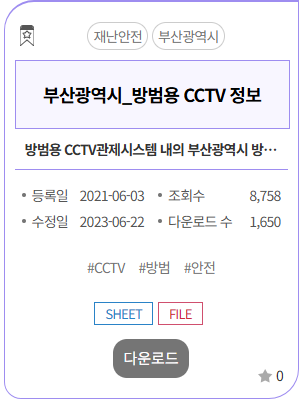

In [1]:
import pandas as pd

file_path = "./ref/부산광역시방범용CCTV정보20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")

CCTV

,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
3,(10차)강서-10-233-2대저2동3147근린공원(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
4,(10차)강서-10-235-2대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
...,...,...,...
6100,반여동_수협_맞은편,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6101,양지빌라_뒤골목,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6102,영진약국앞_사거리,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가
6103,한신휴플러스_주변,"10.1.12.28:0:0:0:0:0:0,10.1.12.28:9400:",해운대-폐공가


In [2]:
# CCTV.columns = ["x", "xx", "local"]

cctv = CCTV.rename(columns={'CCTV 그룹':'local'})['local']


cctv

0        강서-10차
1        강서-10차
2        강서-10차
3        강서-10차
4        강서-10차
         ...   
6100    해운대-폐공가
6101    해운대-폐공가
6102    해운대-폐공가
6103    해운대-폐공가
6104    해운대-폐공가
Name: local, Length: 6105, dtype: object

In [3]:
# 방법1
# cctv = cctv.apply(lambda x: x.split('-')[0])

# 방법2
local_list = []
# for v in cctv:
#     local_list.append(v.split('-')[0])

# 방법3
local_list = cctv.str.extract(r'(\D+)-')[0]



cctv = pd.Series(local_list)
cctv = cctv.value_counts()
cctv = cctv.reset_index()
cctv = cctv.rename(columns={0:'local'})



In [4]:
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [5]:
# cctv.loc[2,'index']

- 행정동별 얀량뱔 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
- 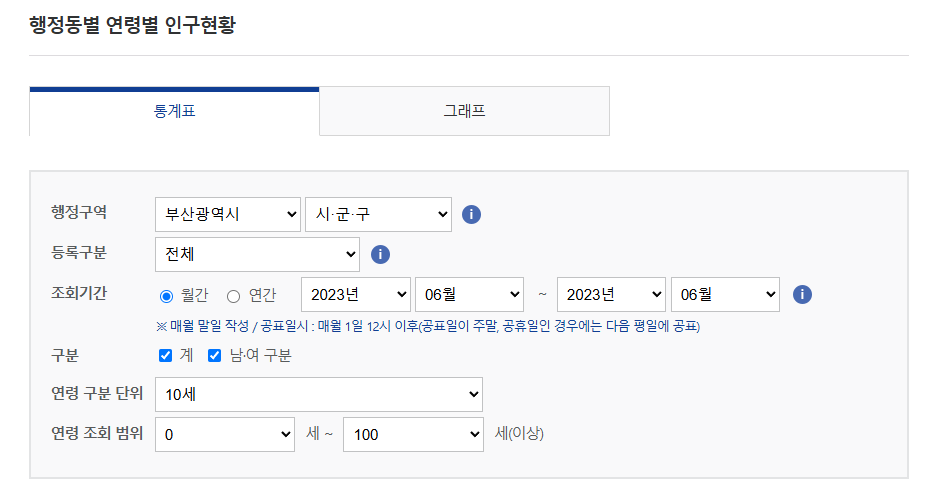

In [6]:
import pandas as pd
import warnings
warnings.simplefilter('ignore', UserWarning)


file_path2 = './ref/연령별인구현황월간202306.xlsx'
ori = pd.read_excel(file_path2, sheet_name='연령별인구현황', skiprows=3)

ori

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17
5,2623000000,부산광역시 부산진구,"357,475","357,475","19,405","24,054","49,960","49,256","49,715","55,808",...,"11,921","26,314","24,077","24,451","28,682","31,317","18,484","9,708","1,324",31
6,2626000000,부산광역시 동래구,"272,590","272,590","18,893","25,485","29,383","31,940","43,738","43,823",...,"12,258","14,375","15,878","22,379","22,669","23,413","13,415","6,220",969,28
7,2629000000,부산광역시 남구,"255,786","255,786","14,568","22,340","32,784","26,678","38,448","41,257",...,"10,895","15,450","12,933","19,212","20,859","22,318","14,312","6,963",958,29
8,2632000000,부산광역시 북구,"276,684","276,684","16,736","21,609","31,476","33,069","37,773","49,562",...,"10,432","14,743","15,645","18,731","26,357","26,262","12,752","6,459","1,005",35
9,2635000000,부산광역시 해운대구,"383,355","383,355","24,071","35,804","41,691","42,119","60,575","67,383",...,"17,293","19,949","21,383","31,709","35,383","32,640","18,247","9,638","1,534",48


In [7]:
data = ori[['행정기관', '총 인구수']]
data.columns = ['local', 'population']
data = data.loc[1:]
# data.replace('부산광역시 ', '')

data['local'] = data['local'].apply(lambda x: x.replace('부산광역시 ', ''))

data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게부여

data['local']

0       중구 
1       서구 
2       동구 
3      영도구 
4     부산진구 
5      동래구 
6       남구 
7       북구 
8     해운대구 
9      사하구 
10     금정구 
11     강서구 
12     연제구 
13     수영구 
14     사상구 
15     기장군 
Name: local, dtype: object

In [8]:
# total = pd.concat([cctv, data], axis=1)

# 방법1
# total.columns = ['local', 'count', 'localx', 'population']
# total = total.drop(columns=['localx'])

# 방법2
# total = total.drop(total.columns[2], axis=1) # 이름이 같을경우 인덱스가 사용안됨.

# total


data.loc[1,'local']

'서구 '

In [9]:
data['local'] = data['local'].apply(lambda x: x.replace('부산진구 ', '진구').replace('구 ', '').replace('군 ', '') if len(x)>3 else x.strip())

data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [10]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(',', '').astype(int)
total = total.sort_values(by='population', ascending=False)


# 중요
total = total.set_index('local')

total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.2, 0.4, '한글')

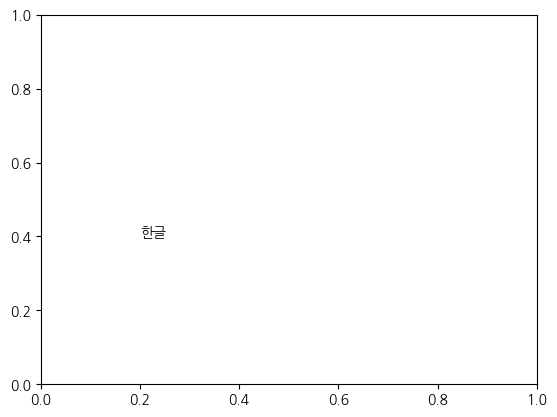

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 리눅스용 폰트
plt.rc('font', family="NanumGothic")
plt.text(0.2,0.4,'한글')

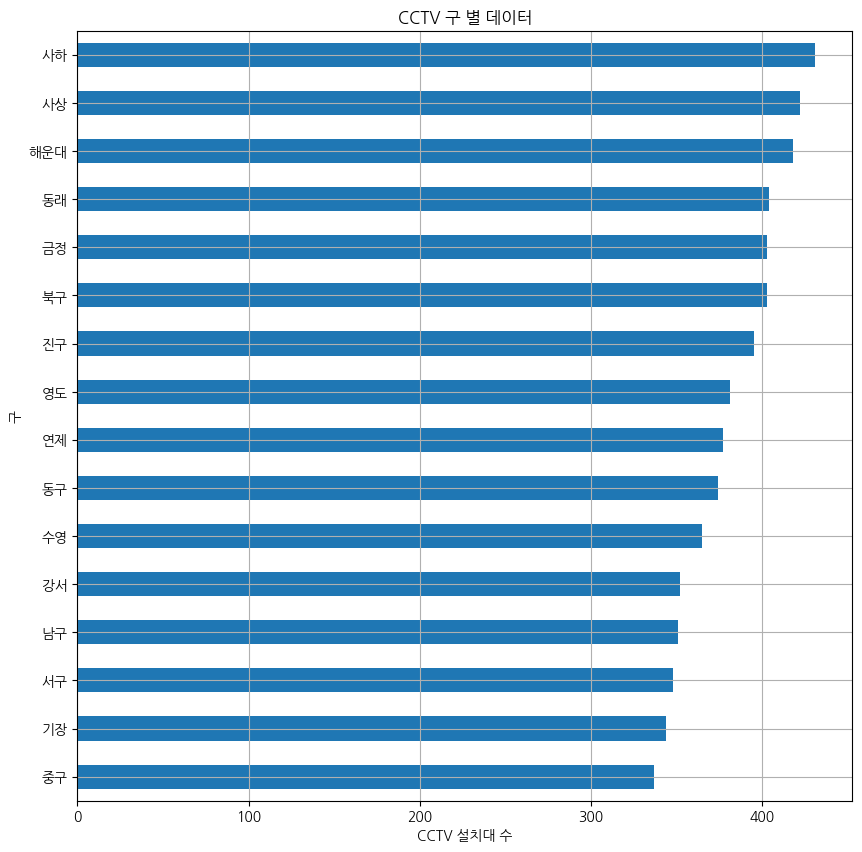

In [12]:
# plt.figure(figsize=(10,10))

total['count'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), ylabel='구')

# plt.plot(x = total['local'], y=total['count'], kind='barh', grid=True, figsize=(10,10), ylabel='구')

plt.title('CCTV 구 별 데이터')
plt.xlabel('CCTV 설치대 수')

plt.show()

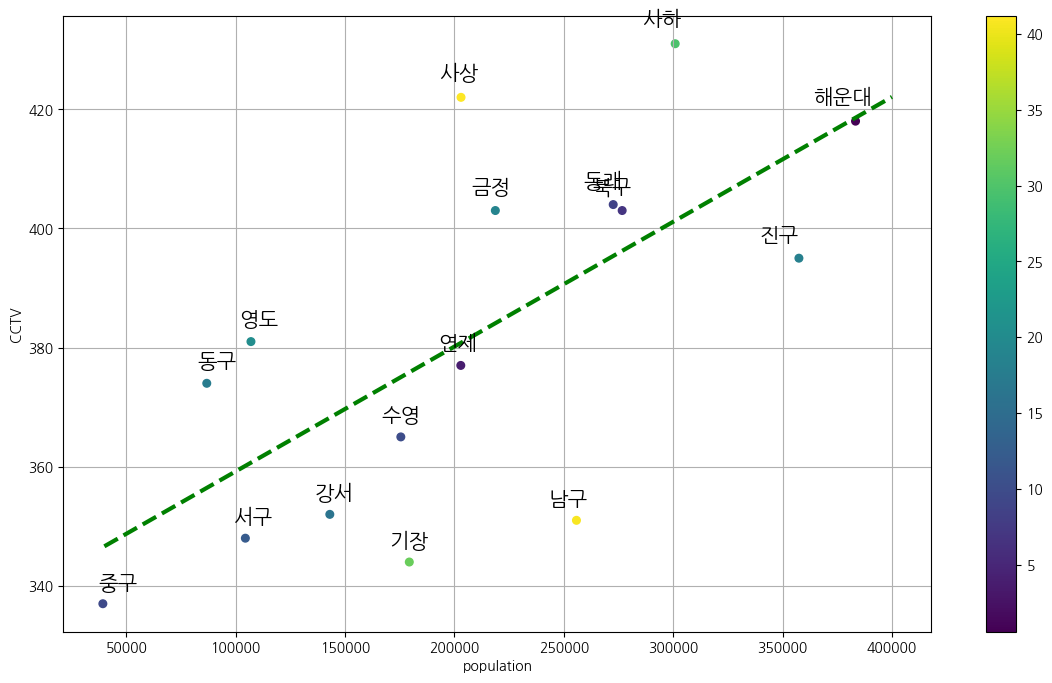

In [13]:
import numpy as np

fp1 = np.polyfit(total['population'], total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)

plt.figure(figsize=(14,8))

plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')



# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s=30, c=total['err'])
plt.xlabel('population')
plt.ylabel('CCTV')


# 점마다 각 구의 이름을 부여
for v in range(len(total['population'])):
    plt.text(total['population'].iloc[v]*0.95, total['count'].iloc[v]*1.007, total.index[v], fontsize=15)

plt.grid()
plt.colorbar()
plt.show()

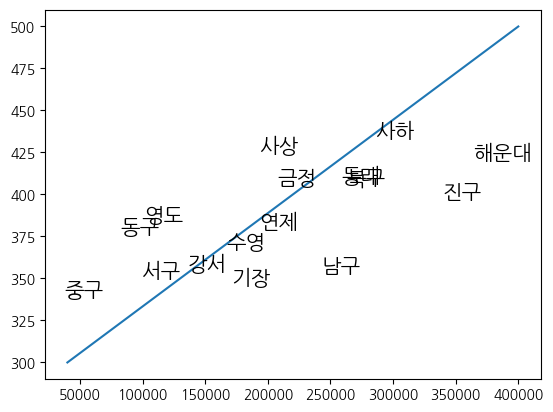

In [14]:
# for n in range(len(total['local'])):
plt.figure()

# plt.text(total['population'].iloc[0], total['count'].iloc[0], total.index[0], fontsize=15)


plt.plot(np.linspace(40000, 400000, 10), np.linspace(300, 500, 10))
for v in range(len(total['population'])):
    plt.text(total['population'].iloc[v]*0.95, total['count'].iloc[v]*1.007, total.index[v], fontsize=15)
plt.show()

In [15]:
total['count'].iloc[0]

418

In [16]:
file_path3 = './ref/경찰청범죄발생지역별통계_20231231.csv'

cdata = pd.read_csv(file_path3, encoding='EUC-KR')

# cdata = cdata.transpose()


In [17]:
clist = []
cdata = cdata.drop('범죄중분류', axis=1)

for c in cdata.columns:
    if '부산' in c:
        clist.append(c)


In [18]:
# cdata = cdata.set_index('범죄대분류')
cdata = cdata.groupby('범죄대분류').sum()

cdata = cdata.loc[:,clist]

cdata

,부산중구,부산서구,부산동구,부산영도구,부산부산진구,부산동래구,부산남구,부산북구,부산강서구,부산해운대구,부산사하구,부산금정구,부산연제구,부산수영구,부산사상구,부산기장군
범죄대분류,,,,,,,,,,,,,,,,
강력범죄,48,36,64,50,366,111,112,102,61,156,105,84,90,109,88,62
교통범죄,329,388,448,354,1473,744,713,529,965,1123,829,627,573,671,844,947
기타범죄,624,557,1287,647,2698,1007,2540,899,883,2456,5400,873,1224,812,985,918
노동범죄,1,1,2,2,10,2,3,3,9,3,2,1,6,0,3,3
마약범죄,42,55,77,44,252,195,146,72,39,165,108,56,112,70,88,68
병역범죄,6,13,8,10,129,32,26,24,17,43,41,19,22,25,38,15
보건범죄,41,40,34,75,259,66,102,61,47,204,112,94,41,294,67,79
선거범죄,4,0,0,1,2,5,1,0,1,0,2,0,1,0,2,1
안보범죄,0,0,0,0,1,4,1,0,1,0,1,0,5,0,0,1


In [19]:
cdata = cdata.transpose().reset_index(names='local')
cdata['local'] = cdata['local'].apply(lambda x: x.replace('부산',''))
cdata['local'] = cdata['local'].apply(lambda x: x.replace('부산','').replace('부산진구', '진구').replace('구', '').replace('군', '') if len(x)>2 else x)

cdata

범죄대분류,local,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,중구,48,329,624,1,42,6,41,4,0,656,989,160,698,28,5
1,서구,36,388,557,1,55,13,40,0,0,714,1013,151,500,40,7
2,동구,64,448,1287,2,77,8,34,0,0,555,1165,181,751,50,5
3,영도,50,354,647,2,44,10,75,1,0,468,864,109,570,34,26
4,진구,366,1473,2698,10,252,129,259,2,1,2592,5099,589,2679,282,11
5,동래,111,744,1007,2,195,32,66,5,4,1330,2042,203,1250,120,0
6,남구,112,713,2540,3,146,26,102,1,1,684,2870,306,996,122,5
7,북구,102,529,899,3,72,24,61,0,0,1011,1849,265,957,78,3
8,강서,61,965,883,9,39,17,47,1,1,476,1760,202,616,72,67
9,해운대,156,1123,2456,3,165,43,204,0,0,1534,3824,429,1422,162,10


In [20]:
# cdata = cdata.set_index('local').reset_index()
test = cdata
test1 = test.groupby('local').sum()
test1

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
local,,,,,,,,,,,,,,,
강서,61,965,883,9,39,17,47,1,1,476,1760,202,616,72,67
금정,84,627,873,1,56,19,94,0,0,880,2722,355,836,405,6
기장,62,947,918,3,68,15,79,1,1,661,1789,210,772,73,36
남구,112,713,2540,3,146,26,102,1,1,684,2870,306,996,122,5
동구,64,448,1287,2,77,8,34,0,0,555,1165,181,751,50,5
동래,111,744,1007,2,195,32,66,5,4,1330,2042,203,1250,120,0
북구,102,529,899,3,72,24,61,0,0,1011,1849,265,957,78,3
사상,88,844,985,3,88,38,67,2,0,951,2617,276,1028,110,13
사하,105,829,5400,2,108,41,112,2,1,940,2534,301,1277,127,41


In [21]:
c_rate = cdata.reset_index(drop=True)
c_rate = c_rate.set_index('local')
c_rate = c_rate.transpose()
c_rate = c_rate.sum()

c_rate = pd.DataFrame(c_rate)
c_rate

,0
local,
중구,3631
서구,3515
동구,4627
영도,3254
진구,16442
동래,7111
남구,8627
북구,5853
강서,5216


In [22]:
c_rate = c_rate.reset_index()
c_rate = c_rate.rename(columns={0:'value'})
c_rate

,local,value
0,중구,3631
1,서구,3515
2,동구,4627
3,영도,3254
4,진구,16442
5,동래,7111
6,남구,8627
7,북구,5853
8,강서,5216
9,해운대,11531


In [23]:
c_total = pd.merge(total, c_rate, on='local')

c_total

,local,count,population,err,value
0,해운대,418,383355,0.579794,11531
1,진구,395,357475,18.157149,16442
2,사하,431,300922,29.692421,11820
3,북구,403,276684,6.771018,5853
4,동래,404,272590,8.628835,7111
5,남구,351,255786,40.850217,8627
6,금정,403,218711,18.918120,6958
7,사상,422,203029,41.203975,7110
8,연제,377,202919,3.772977,7651
9,기장,344,179384,31.841680,5635


In [24]:
c_total['c_rate'] = (c_total['value'] * 100) / c_total['population']

c_total

,local,count,population,err,value,c_rate
0,해운대,418,383355,0.579794,11531,3.007917
1,진구,395,357475,18.157149,16442,4.599482
2,사하,431,300922,29.692421,11820,3.927928
3,북구,403,276684,6.771018,5853,2.115410
4,동래,404,272590,8.628835,7111,2.608680
5,남구,351,255786,40.850217,8627,3.372741
6,금정,403,218711,18.918120,6958,3.181367
7,사상,422,203029,41.203975,7110,3.501963
8,연제,377,202919,3.772977,7651,3.770470
9,기장,344,179384,31.841680,5635,3.141306


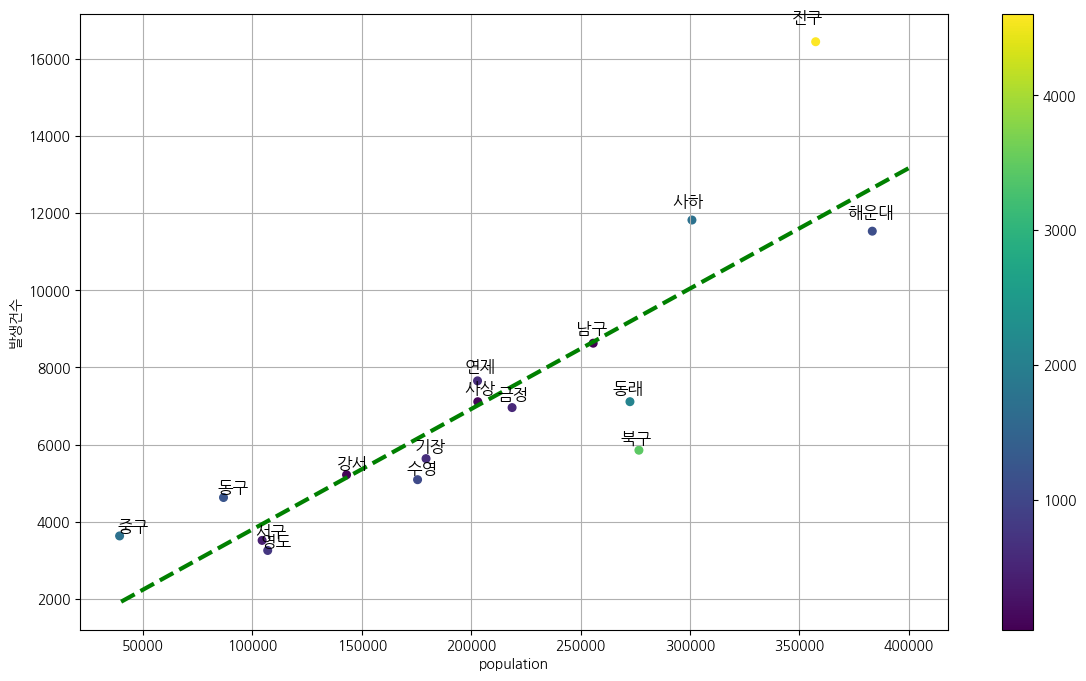

In [25]:
fp2 = np.polyfit(c_total['population'], c_total['value'], 1)
f2 = np.poly1d(fp2)
fx = np.linspace(40000, 400000, 10)

plt.figure(figsize=(14,8))

plt.plot(fx, f2(fx), ls='dashed', lw=3, color='g')



# 오차
c_total['c_err'] = np.abs(c_total['value'] - f2(c_total['population']))

plt.scatter(c_total['population'], c_total['value'], s=30, c=c_total['c_err'])
plt.xlabel('population')
plt.ylabel('발생건수')


# 점마다 각 구의 이름을 부여
for v in range(len(c_total['population'])):
    plt.text(c_total['population'].iloc[v]*0.97, c_total['value'].iloc[v]*1.03, c_total['local'].iloc[v], fontsize=12)

plt.grid()
plt.colorbar()
plt.show()

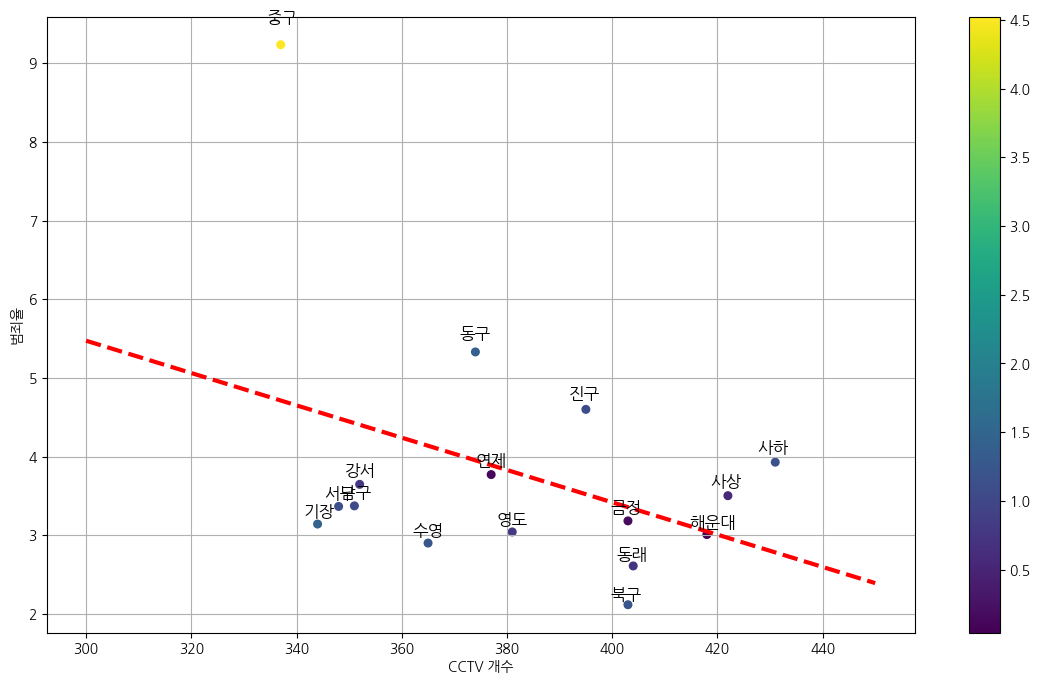

In [36]:
fp3 = np.polyfit(c_total['count'], c_total['c_rate'], 1)
f3 = np.poly1d(fp3)
fx = np.linspace(300, 450, 10)

plt.figure(figsize=(14,8))
plt.plot(fx, f3(fx), ls='dashed', lw=3, color='r')

c_total['c_err'] = np.abs(c_total['c_rate'] - f3(c_total['count']))

plt.scatter(c_total['count'], c_total['c_rate'], s=30, c=c_total['c_err'])
plt.xlabel('CCTV 개수')
plt.ylabel('범죄율')


for v in range(len(c_total['count'])):
    plt.text(c_total['count'].iloc[v]*0.992, c_total['c_rate'].iloc[v]*1.03, c_total['local'].iloc[v], fontsize=12)

plt.grid()
plt.colorbar()
plt.show()


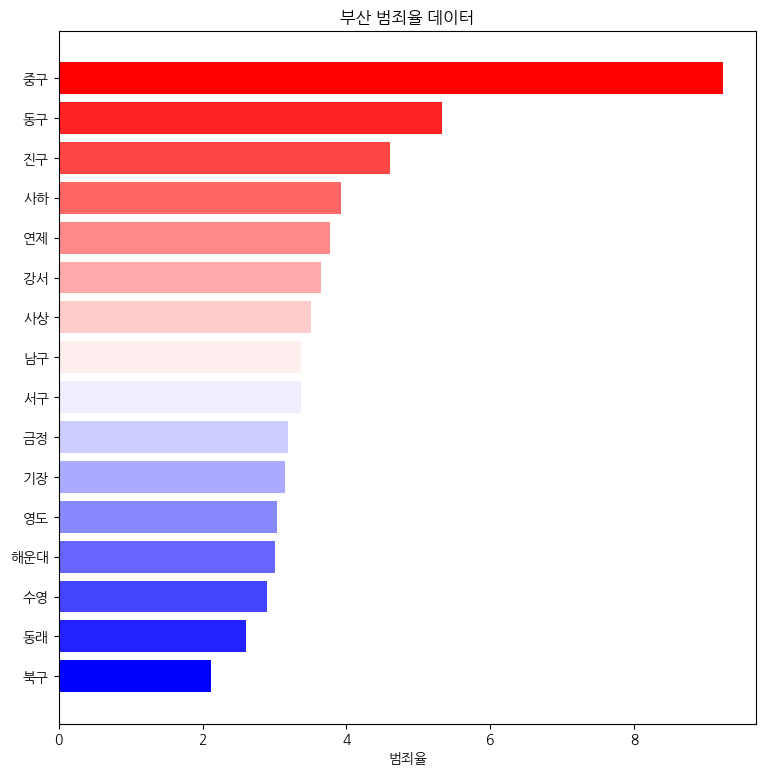

In [27]:
# c_total['c_rate'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), ylabel='구')

cc = c_total.sort_values(['c_rate'])


cmap = plt.cm.bwr  # 컬러맵 선택
colors = cmap(np.linspace(0, 1, len(cc['local'])))  

plt.figure(figsize=(9,9))
plt.barh(cc['local'], cc['c_rate'], color=colors)

plt.title('부산 범죄율 데이터')
plt.xlabel('범죄율')

plt.show()